# Exercise 2: Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

**Data Visualization for Two Exam Scores**

In [2]:
def load_data():
    return (np.loadtxt('ex2data1.txt', delimiter=','))

In [16]:
def plot_data(data, x_label, y_label, pos_label, neg_label):
    # get a numpy array with indices of admitted student exam scores
    admitted_indices = data[:,2] == 1
    # get a numpy array with indices of rejected student exam scores
    rejected_indices = data[:,2] == 0
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(data[admitted_indices][:,0], data[admitted_indices][:,1], marker='+', c='black', s=50, linewidth=2, label=pos_label)
    plt.scatter(data[rejected_indices][:,0], data[rejected_indices][:,1], c='y', s=50, linewidth=2)
    

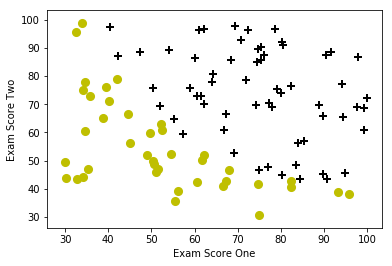

In [17]:
data_set_one = load_data()
plot_data(data_set_one, 'Exam Score One', 'Exam Score Two', 'Admitted', 'Rejected')